# Belt Exam Adanced Machine Learning - Bautista

### Cargando Librerías y datos

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import SelectKBest, f_classif, f_regression, chi2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [11]:
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
data_unseen = df.drop(df.sample(frac=0.9, random_state=1000).index)

In [14]:
df = df.sample(frac=0.9, random_state=1000)

In [15]:
df.shape

(256326, 31)

In [16]:
df.sample(frac=0.743, random_state=1000).to_csv('creditcardcc.csv')

In [17]:
data_unseen.to_csv('creditcardcc_new.csv')

In [18]:
data_unseen.drop(columns=['Class']).to_csv('creditcardcc_score.csv')

### Verificando tipoos de datos, NA's y duplicados

In [19]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [20]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
df.duplicated().any()

True

In [22]:
df.drop_duplicates(inplace=True)

### Análisis Estadístico y Exploratorio

In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000,255425.000000
mean,94747.557436,0.007456,-0.002691,0.003343,-0.002226,0.003836,-0.000056,0.000519,0.000248,-0.001559,-0.000488,-0.000256,-0.000280,0.000550,0.000632,0.001814,0.001572,0.000931,0.000909,0.000307,0.000073,-0.000438,-0.000233,0.000579,0.000144,0.000071,0.000840,0.001350,0.000656,87.897434,0.001629
std,47475.292403,1.944683,1.640308,1.504718,1.412919,1.376214,1.332954,1.220510,1.178902,1.094524,1.073939,1.017380,0.991989,0.995918,0.949467,0.914916,0.871621,0.839265,0.836808,0.814204,0.761354,0.721403,0.724142,0.620931,0.605787,0.520638,0.482153,0.396534,0.330205,244.416992,0.040324
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-18.822087,-4.391307,-14.129855,-25.162799,-9.498746,-6.938297,-54.497720,-34.830382,-9.499423,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54158.000000,-0.915687,-0.598584,-0.888347,-0.848835,-0.688911,-0.768533,-0.552266,-0.208507,-0.643958,-0.534927,-0.761153,-0.406320,-0.647676,-0.424905,-0.579378,-0.466385,-0.483652,-0.498850,-0.456554,-0.211297,-0.228226,-0.542996,-0.161636,-0.354719,-0.317723,-0.326635,-0.070679,-0.052894,5.550000,0.000000
50%,84612.000000,0.021444,0.064475,0.180814,-0.021687,-0.052184,-0.274184,0.040140,0.022500,-0.052558,-0.093244,-0.034065,0.138622,-0.012896,0.050467,0.049674,0.066907,-0.065683,-0.002644,0.003942,-0.062257,-0.029356,0.006322,-0.011161,0.041112,0.016477,-0.051266,0.001337,0.011294,22.000000,0.000000
75%,139251.000000,1.315852,0.800647,1.028139,0.739895,0.613515,0.399562,0.570233,0.326511,0.595619,0.454012,0.738669,0.617054,0.663506,0.491701,0.651243,0.523931,0.399365,0.501455,0.459475,0.132977,0.186244,0.527631,0.147615,0.439544,0.350871,0.241288,0.091009,0.078228,77.500000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,19.587773,15.594995,23.745136,11.669205,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,4.712398,5.591971,38.117209,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


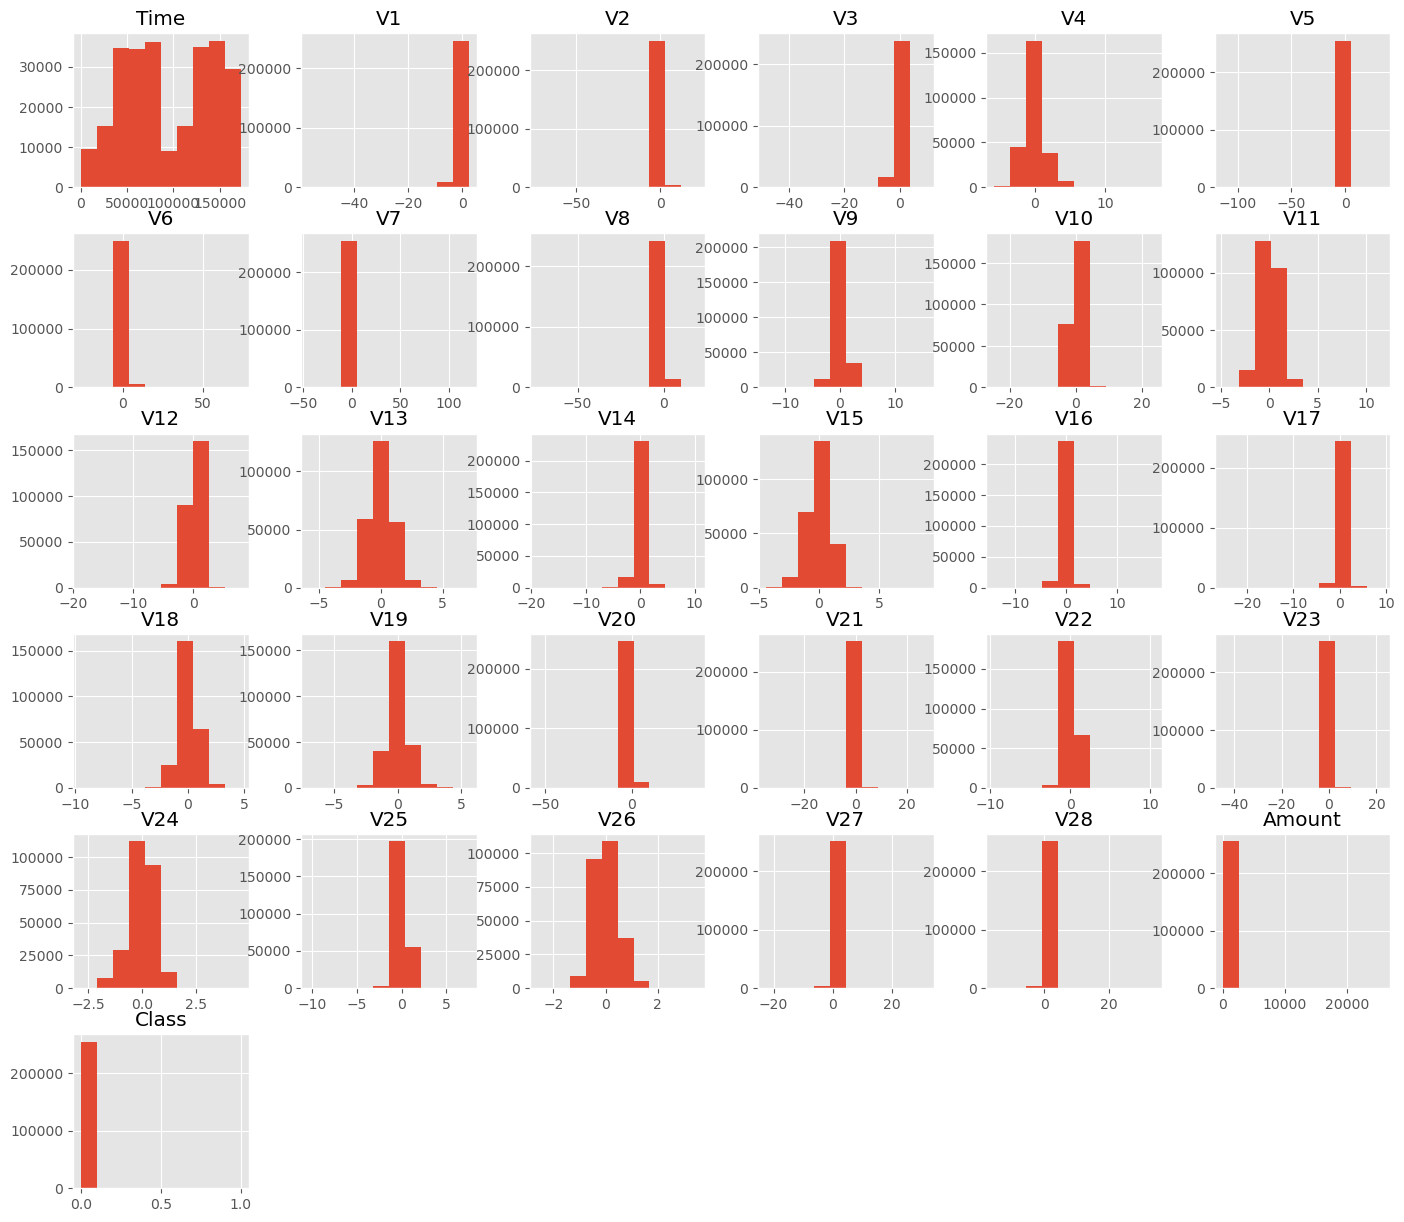

In [24]:
num_bins = 10
df.hist(bins = num_bins, figsize=(17,15))
plt.show()

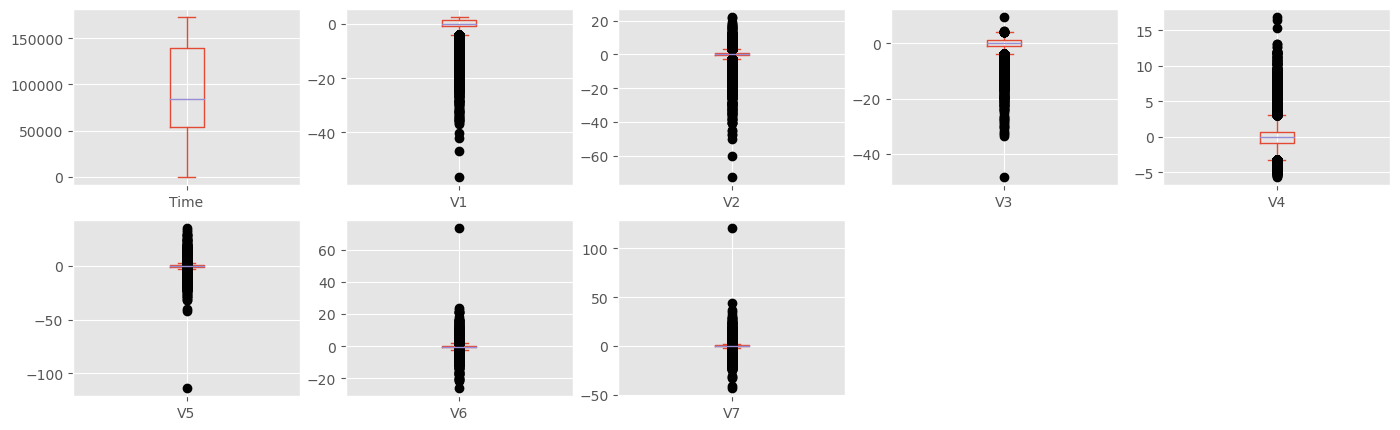

In [25]:
fig = plt.figure(figsize = (17,16))
ax = fig.gca()
df.iloc[:,0:8].rename(columns=lambda x: str(x)).plot(ax=ax, kind= 'box', subplots=True, layout=(6,5), sym='black')
plt.show()

<AxesSubplot:xlabel='V1', ylabel='V2'>

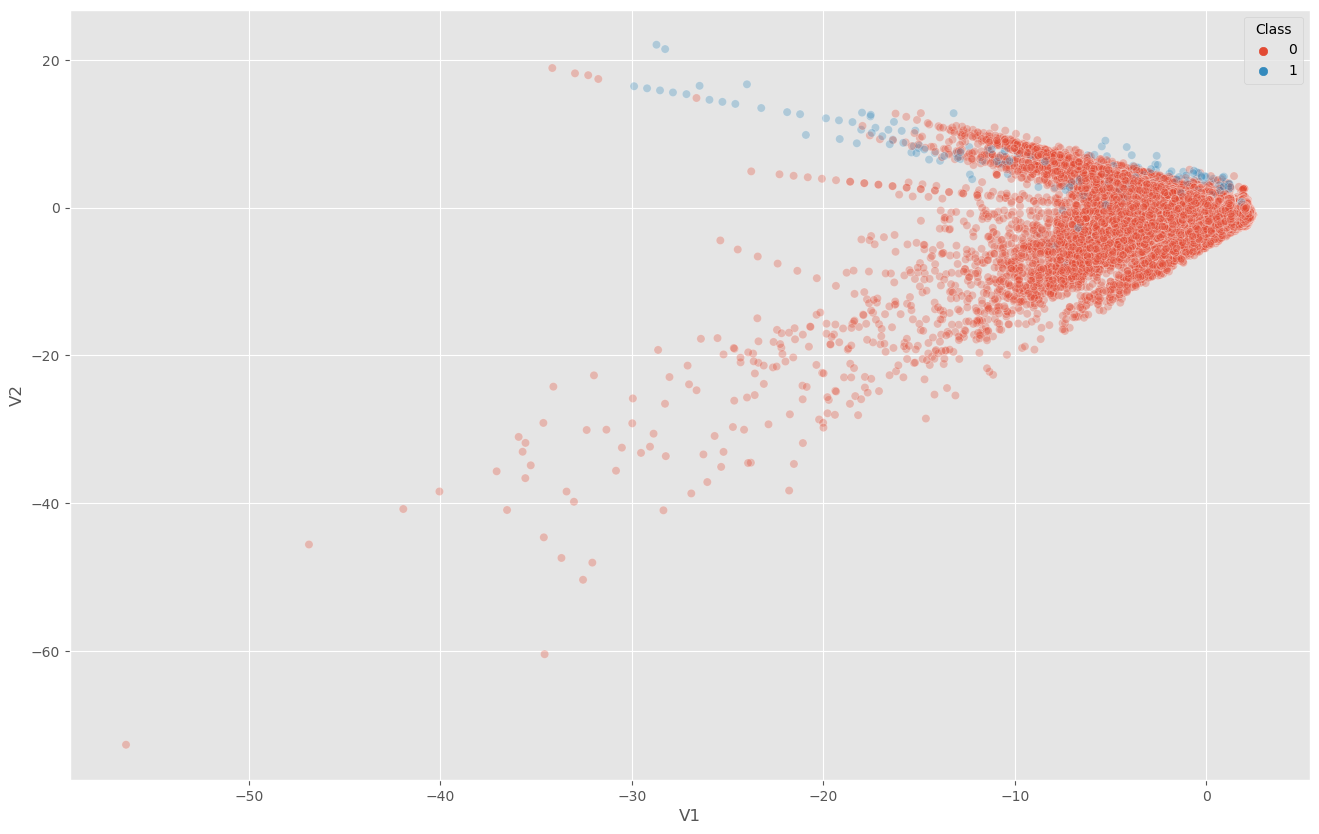

In [26]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="V1", y="V2",
    hue="Class",
    data=df,
    legend="full",
    alpha=0.3
)

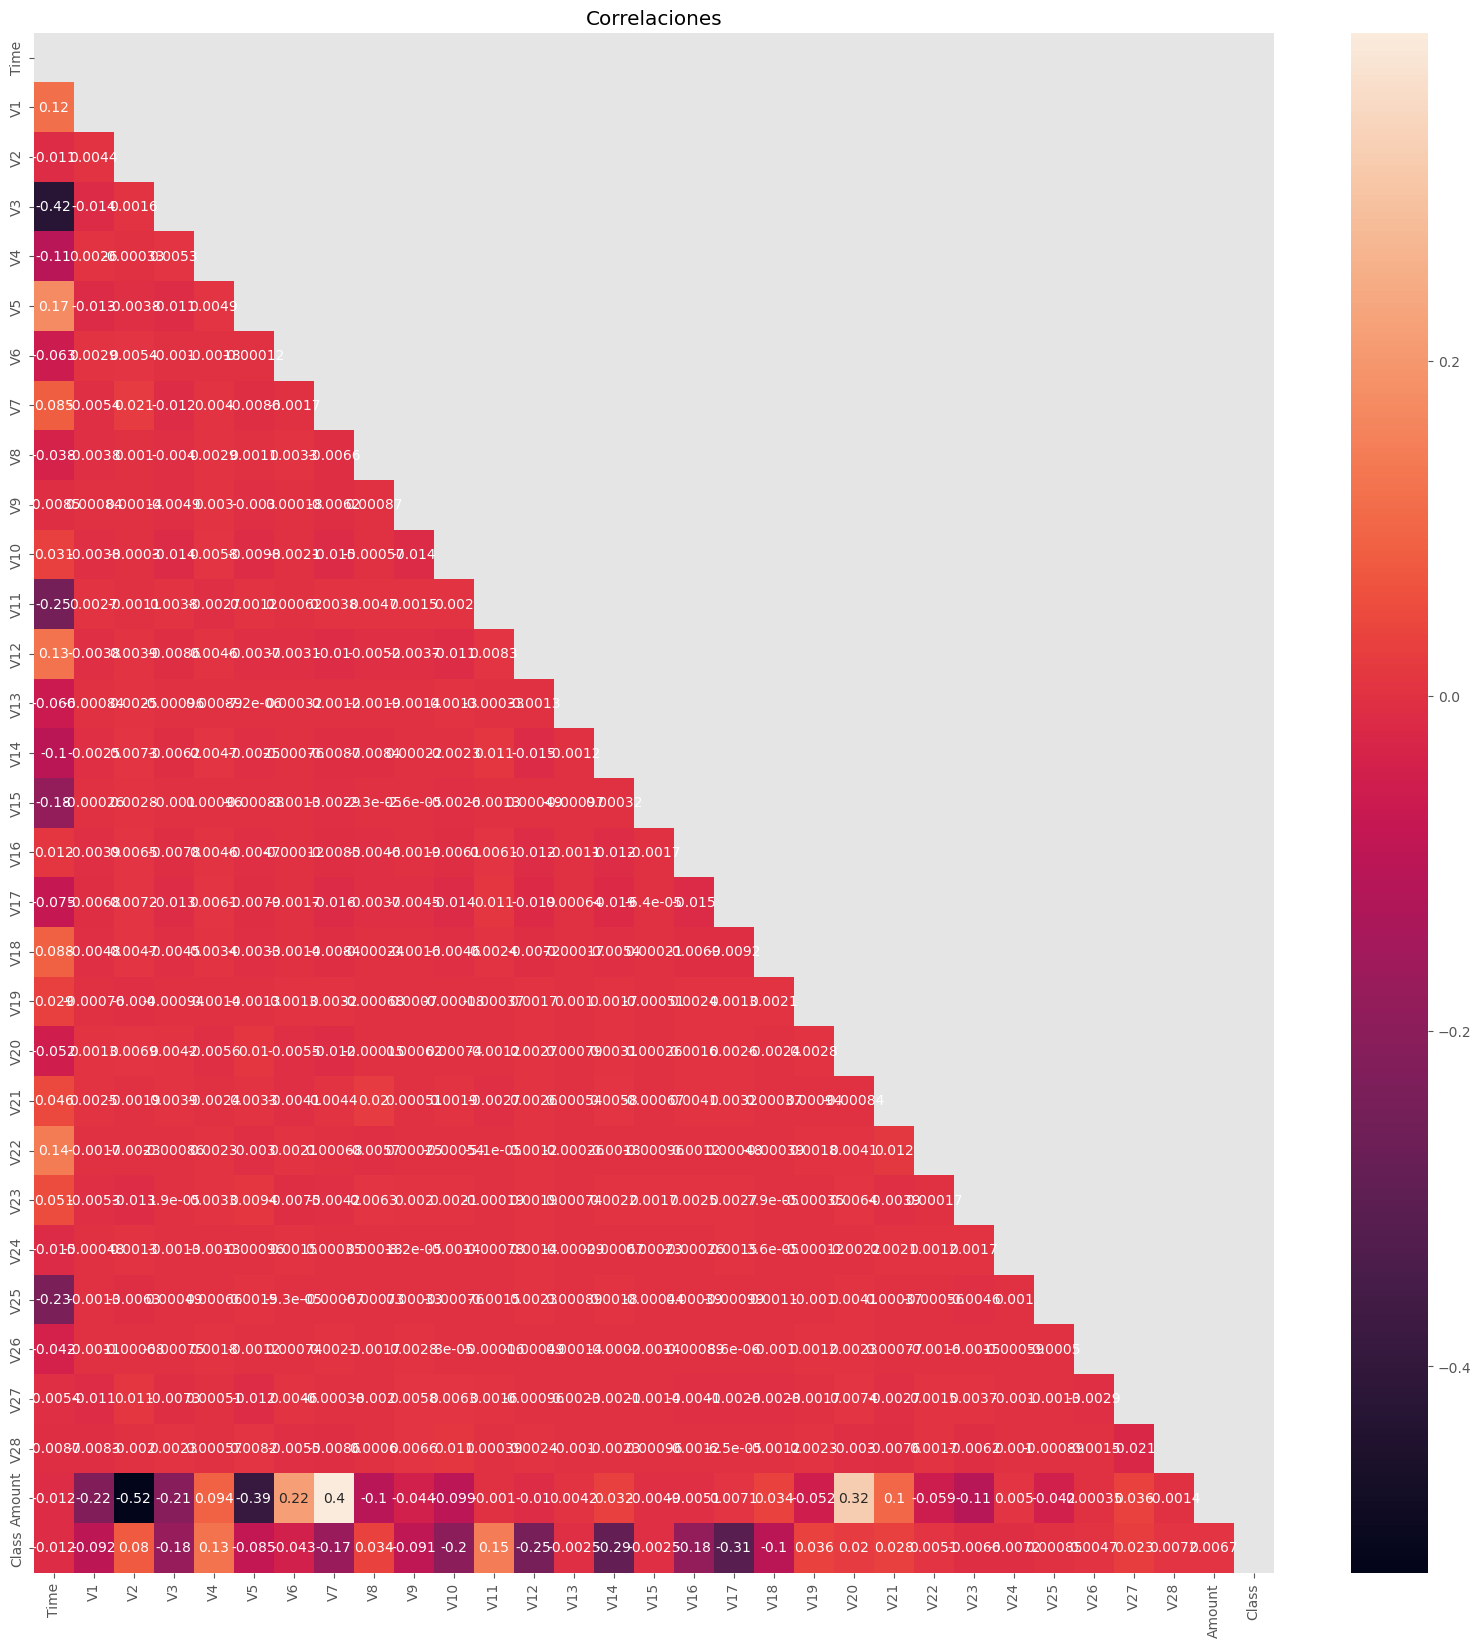

In [27]:
plt.rcParams['figure.figsize'] = (20, 20)

data_corr = df.corr()

mask = np.triu(np.ones_like(data_corr, dtype=bool))

sns.heatmap(data_corr, annot = True, mask=mask)
plt.title('Correlaciones')
plt.show()

In [28]:
corr = df.iloc[:,0:31].corr()
print(corr['Class'].sort_values(ascending=False), '\n')

Class     1.000000
V11       0.146053
V4        0.126494
V2        0.080105
V19       0.035754
V8        0.033588
V21       0.028096
V27       0.022875
V20       0.020220
V28       0.007158
Amount    0.006664
V22       0.005126
V26       0.004680
V25       0.000852
V15      -0.002471
V13      -0.002518
V23      -0.006637
V24      -0.007179
Time     -0.011597
V6       -0.042936
V5       -0.084804
V9       -0.091192
V1       -0.092330
V18      -0.102631
V7       -0.168120
V3       -0.177516
V16      -0.184606
V10      -0.202581
V12      -0.245238
V14      -0.287271
V17      -0.308981
Name: Class, dtype: float64 



### Elección de Variables y Componentes Principales

Debido a que no se cuenta con las características originales ni su matriz de covariancias como para realizar un criterio de selección de componentes principales como el de Kaiser, se utilizará Select K best mediante f_classif (ANOVA F-value) para elegir qué variables y componentes se terminarán utilizando

In [29]:
X = df.loc[: ,'Time' : 'Amount']
y = df['Class']

In [30]:
X.shape

(255425, 30)

In [31]:
test = SelectKBest(k=10)
fit = test.fit(X,y)

In [32]:
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(X.columns)

In [33]:
feature_scores = pd.concat([data_columns, data_scores],axis=1)
feature_scores.columns = ['Variable','Score']
print(feature_scores.nlargest(10,'Score'))

   Variable         Score
17      V17  26958.733058
14      V14  22974.737948
12      V12  16344.534506
10      V10  10930.937321
16      V16   9011.765256
3        V3   8310.763555
7        V7   7429.307730
11      V11   5567.310303
4        V4   4153.413030
18      V18   2719.065700


In [34]:
#Primeras 10
X_2 = SelectKBest(k=10).fit_transform(X, y)

In [35]:
filter = fit.get_support()
features = np.array(X.columns)
 
print("Todos:")
print(features)
 
print("Mejores 10:")
print(features[filter])

Todos:
['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount']
Mejores 10:
['V3' 'V4' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18']


In [36]:
features

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

In [37]:
X = X[features[filter]]

In [38]:
X.shape

(255425, 10)

In [39]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
198800,132658.0,2.056433,-0.316915,-2.789687,-0.775164,2.497163,3.164444,-0.396550,0.715194,0.448127,0.031925,0.062134,0.285060,-0.143595,0.695205,1.166183,-0.285793,-0.586824,-0.179526,-0.356447,-0.165740,0.243647,0.743975,0.037861,0.737525,0.302948,-0.087858,-0.001144,-0.064954,3.80,0
95536,65359.0,-0.476480,0.967301,1.660071,0.000008,-0.106866,-0.624360,0.599600,0.085344,-0.329163,-0.339743,0.009128,-0.184552,-0.661027,0.312292,1.143374,-0.160102,0.038876,-0.832285,-0.463678,0.015199,-0.186026,-0.470205,0.055860,0.364065,-0.331242,0.082720,0.278155,0.119504,3.57,0
180242,124448.0,1.943666,-1.029557,-1.276665,-0.427737,-0.815657,-1.007531,-0.293930,-0.238641,-0.743251,1.125115,0.715034,0.108573,-0.598224,0.642955,-0.088718,-1.208088,-0.395249,1.690337,-0.787745,-0.449719,-0.027971,0.203359,0.049295,0.092062,-0.178437,0.762153,-0.089487,-0.057625,107.77,0
278892,168508.0,-0.343991,1.475547,0.349266,1.211181,-0.510325,-1.281538,0.455647,0.011873,-0.737317,0.100004,0.206215,0.822183,1.210682,0.648329,1.762114,-1.510486,0.867453,0.083585,2.085689,0.248074,0.463618,1.563284,-0.107122,1.032006,-0.465200,0.211401,0.238458,0.208167,7.84,0
85098,60601.0,1.185368,0.248102,1.110961,2.448941,-0.387718,0.503952,-0.546283,0.203680,0.070122,0.556493,-1.629569,-0.384113,-0.111375,-0.261692,0.227295,1.061883,-0.848664,0.222660,-0.662600,-0.141848,-0.102446,-0.226039,-0.052715,-0.481575,0.368006,0.004532,0.033685,0.027790,4.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164058,116421.0,2.040040,-0.131315,-1.215595,0.200441,0.124243,-0.580568,0.044931,-0.125706,0.335918,0.240088,0.619449,0.916605,-0.140840,0.490583,-0.563582,0.157609,-0.616870,-0.310363,0.515638,-0.220229,-0.260543,-0.651279,0.288120,-0.471220,-0.296312,0.209050,-0.072965,-0.075260,0.99,0
11891,20474.0,-10.931437,9.092123,-3.473866,-0.920861,-3.176341,4.401880,-9.494388,-21.283961,3.172836,2.506592,1.604644,0.575652,0.662976,3.676920,-0.870836,0.666121,2.993476,0.530599,-0.941133,-4.516221,22.614889,-8.593642,3.787713,-0.544336,0.644307,0.241288,1.106555,0.151340,9.98,0
114858,73650.0,-1.865804,-1.420319,0.786553,-2.214499,0.450768,-1.470091,-0.699823,0.284201,-2.928371,0.446361,-1.409431,-0.871451,1.082562,0.016426,-0.187064,-0.071370,0.267827,-0.178930,-0.176560,0.133551,-0.368057,-1.525503,-0.087408,-0.504808,0.398293,-0.576744,-0.078974,-0.251383,39.90,0
21825,31879.0,1.286196,-0.859113,0.569437,-0.835278,-0.924098,0.245294,-1.010179,0.080592,-0.434943,0.523913,-0.750533,-0.525580,1.008811,-0.569483,1.372264,1.411246,-0.000172,-1.087544,0.159145,0.231493,0.393242,1.035372,-0.231151,-0.705249,0.465035,0.024961,0.046436,0.024518,66.00,0


### Dividiendo Test Train

In [40]:
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

### Datos Desbalanceados

In [41]:
plt.rcParams['figure.figsize'] = (12, 8)

<AxesSubplot:xlabel='Class', ylabel='count'>

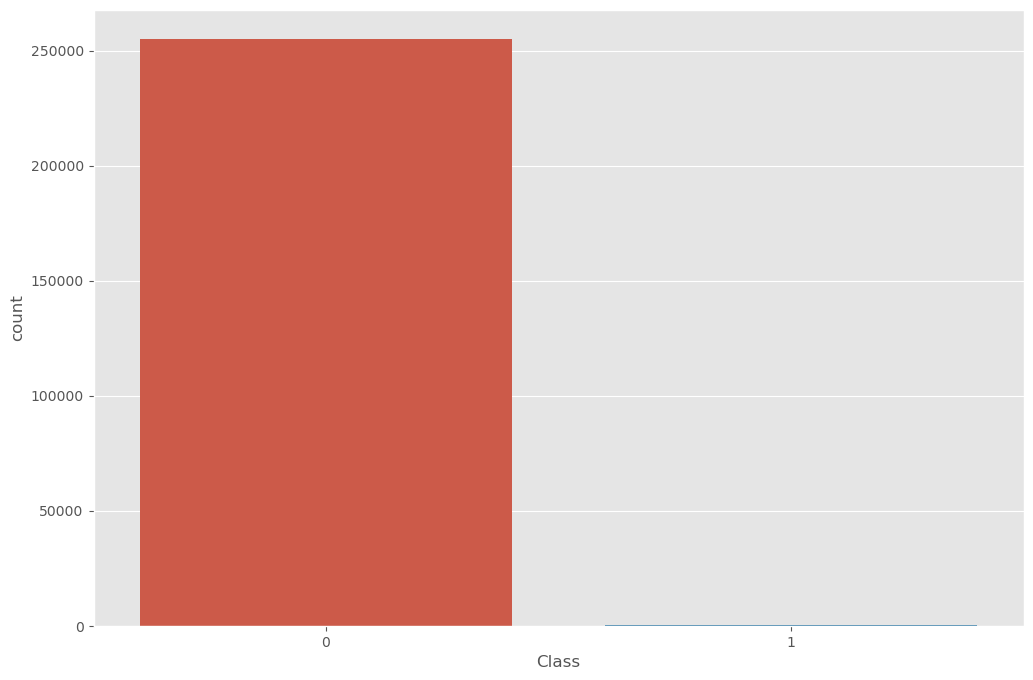

In [42]:
sns.countplot(x='Class', data=df)

In [43]:
df['Class'].value_counts(normalize=True)*100

0    99.837134
1     0.162866
Name: Class, dtype: float64

Frente a que hay un fuerte desbalanceo de datos, se utilizará la técnica de undersampling con NearMiss

In [44]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
nm = NearMiss()

In [46]:
X_res, y_res = nm.fit_resample(X_train, y_train)

In [47]:
from collections import Counter

In [48]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 291, 1: 291})


In [49]:
y_res.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: Class, dtype: float64

### Probando Modelos

In [91]:
num_folds = 10


models = []
models.append(("KNN", KNeighborsClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier(max_depth=5)))
models.append(("Bagging Trees", BaggingClassifier()))
models.append(("Logistic Regression (L1)", LogisticRegression(penalty='l1', solver='liblinear')))
models.append(("Logistic Regression (L2)", LogisticRegression(penalty='l2')))
models.append(("Random Forest", RandomForestClassifier(n_estimators=200, criterion= 'entropy')))
models.append(("AdaBoost Classifier", AdaBoostClassifier(n_estimators=200)))
models.append(("XGBoost Classifier", xgb.XGBClassifier(n_estimators=200, objective = 'binary:logistic')))
models.append(("Multi-layer Perceptron", MLPClassifier(solver='lbfgs')))

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [92]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_res, y_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f} ({cv_results.std():,.3f})")

KNN: 0.936 (0.061)
Decision Tree: 0.943 (0.031)
Bagging Trees: 0.947 (0.032)
Logistic Regression (L1): 0.935 (0.054)
Logistic Regression (L2): 0.936 (0.051)
Random Forest: 0.960 (0.030)
AdaBoost Classifier: 0.945 (0.039)
XGBoost Classifier: 0.954 (0.036)
Multi-layer Perceptron: 0.916 (0.038)


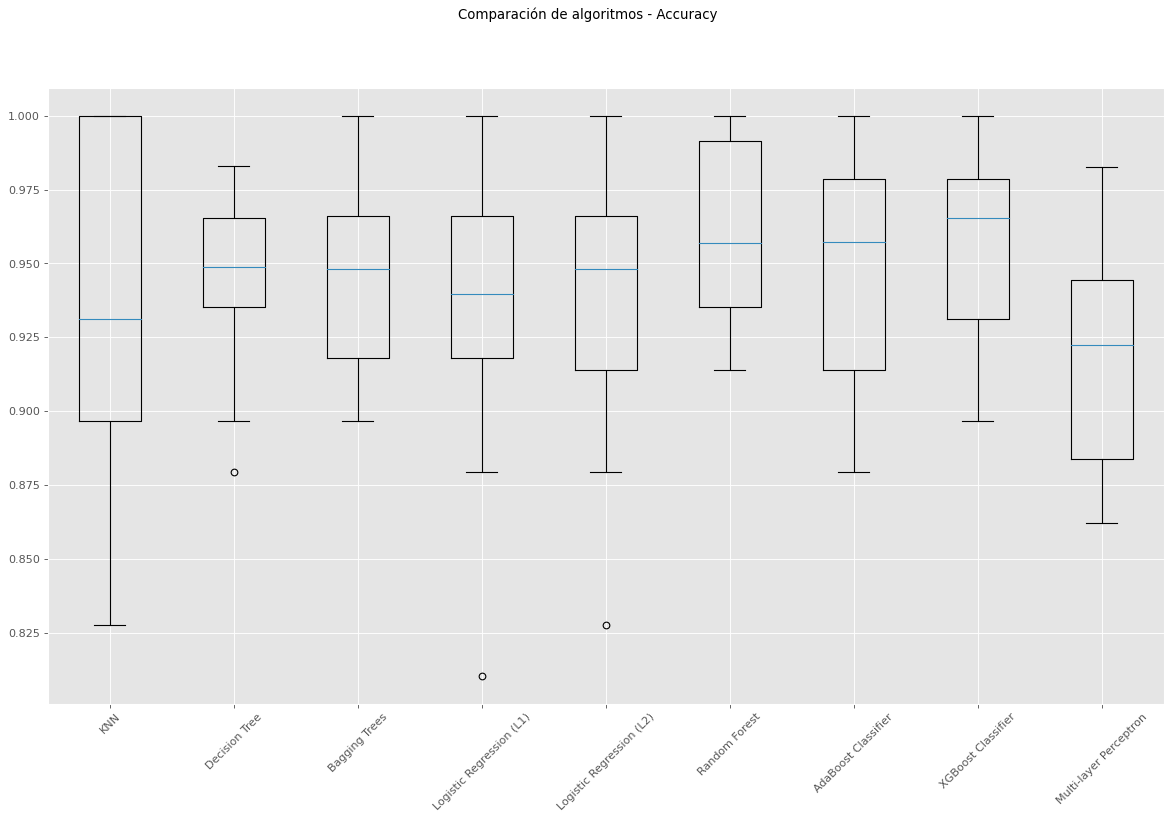

In [93]:
fig = plt.figure(figsize=(18, 10), dpi=80)

fig.suptitle('Comparación de algoritmos - Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation = 45)
plt.show()

In [94]:
results = []
names = []
scoring = 'balanced_accuracy'
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_res, y_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f} ({cv_results.std():,.3f})")

KNN: 0.936 (0.061)
Decision Tree: 0.957 (0.022)
Bagging Trees: 0.954 (0.031)
Logistic Regression (L1): 0.936 (0.056)
Logistic Regression (L2): 0.938 (0.052)
Random Forest: 0.964 (0.027)
AdaBoost Classifier: 0.951 (0.033)
XGBoost Classifier: 0.959 (0.031)
Multi-layer Perceptron: 0.879 (0.155)


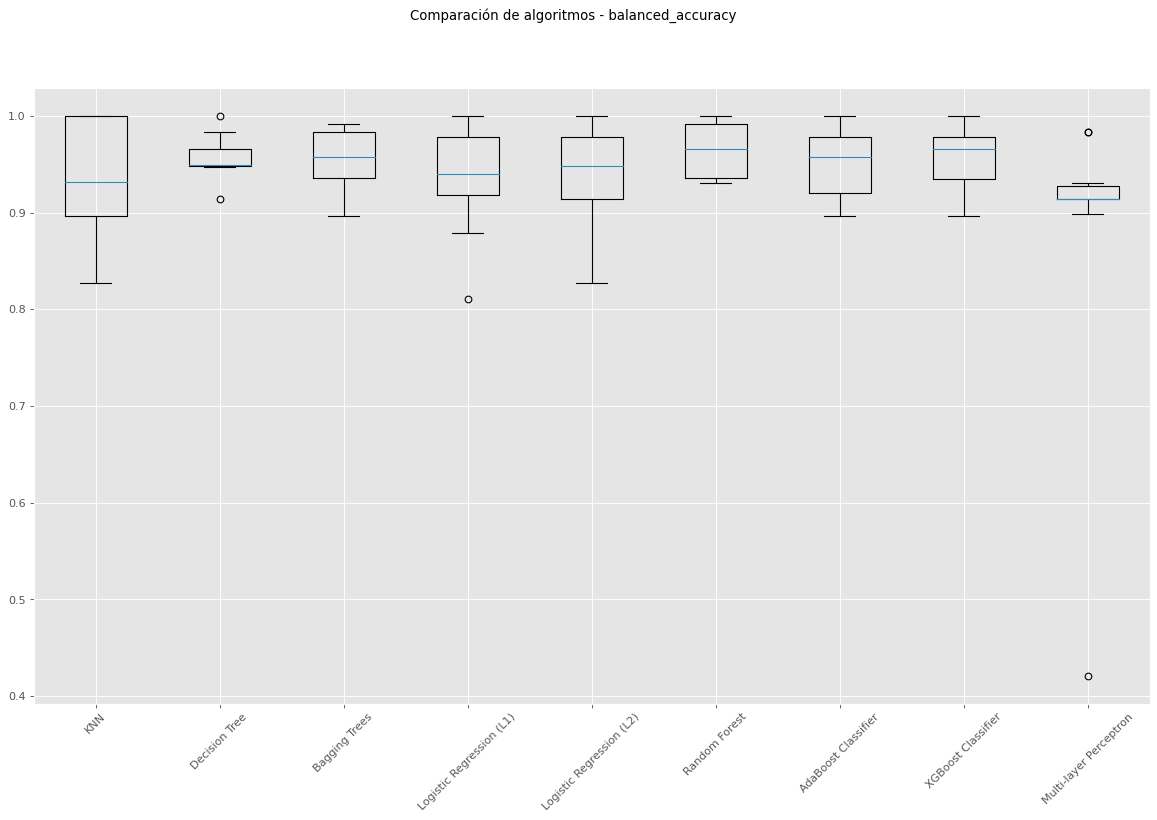

In [95]:
fig = plt.figure(figsize=(18, 10), dpi=80)

fig.suptitle('Comparación de algoritmos - balanced_accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation = 45)
plt.show()

In [96]:
results = []
names = []
scoring = 'f1_weighted'
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_res, y_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f} ({cv_results.std():,.3f})")

KNN: 0.966 (0.033)
Decision Tree: 0.972 (0.014)
Bagging Trees: 0.974 (0.018)
Logistic Regression (L1): 0.964 (0.030)
Logistic Regression (L2): 0.965 (0.027)
Random Forest: 0.977 (0.017)
AdaBoost Classifier: 0.970 (0.023)
XGBoost Classifier: 0.975 (0.021)
Multi-layer Perceptron: 0.959 (0.020)


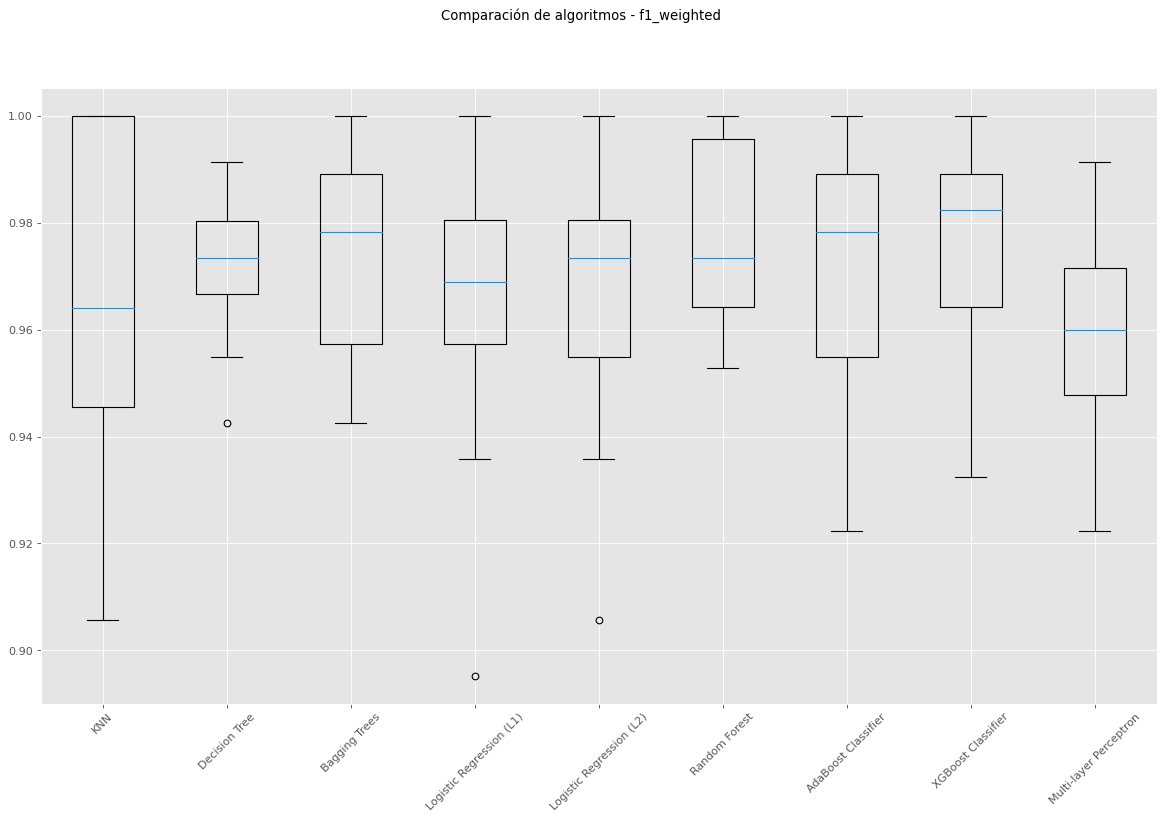

In [97]:
fig = plt.figure(figsize=(18, 10), dpi=80)

fig.suptitle('Comparación de algoritmos - f1_weighted')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation = 45)
plt.show()

Juzgando por el Accuracy, el Accuracy balanceado y el F1 ponderado mediante los scores de validación cruzada, se puede afirmar que el XGboost classifier tiene un mejor desempeño promedio

### Tuneado XGboost con HYPEROPT 

Fuente del código de optimización: https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning

In [98]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [99]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [100]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_res, y_res), ( X_test, y_test)]
    
    clf.fit(X_res, y_res,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [101]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.9706895651719998                                     
SCORE:                                                                            
0.9983687424962154                                                                
SCORE:                                                                            
0.9983687424962154                                                                
SCORE:                                                                            
0.9983687424962154                                                                
SCORE:                                                                            
0.9983687424962154                                                                
SCORE:                                                                            
0.8338988359346453                                                                
SCORE:                                                    

In [102]:
print("Mejores hyperparametros : ","\n")
print(best_hyperparams)

Mejores hyperparametros :  

{'colsample_bytree': 0.7374195520571349, 'gamma': 6.917044807116284, 'max_depth': 11.0, 'min_child_weight': 0.0, 'reg_alpha': 158.0, 'reg_lambda': 0.6983089924752687}


### XGBClassifier

In [112]:
model = xgb.XGBClassifier(colsample_bytree=0.7374195520571349,
                      n_estimators=1000, 
                      min_child_weight=0.0,
                      reg_alpha = 158.0,
                      reg_lambda=0.6983089924752687,
                      max_depth=11, 
                      gamma=6.917044807116284)

In [113]:
model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7374195520571349, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=6.917044807116284, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=11,
              max_leaves=None, min_child_weight=0.0, missing=nan,
              monotone_constraints=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [114]:
print('Training accuracy:', model.score(X_res, y_res))
print('Testing accuracy:', model.score(X_test, y_test))

Training accuracy: 0.5
Testing accuracy: 0.9983687424962154


### Predicciones

In [106]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.84%


In [108]:
import pickle
filename = 'bestmodel.pkl'
pickle.dump(model, open(filename, 'wb'))

### Evaluación de Modelos

In [53]:
import pickle
filename = 'bestmodel.pkl'
model = pickle.load(open(filename, 'rb'))

In [54]:
data_unseen.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
11,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,-0.259116,-0.326143,-0.090047,0.362832,0.928904,-0.129487,-0.809979,0.359985,0.707664,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
21,17.0,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,1.690330,0.406774,-0.936421,0.983739,0.710911,-0.602232,0.402484,-1.737162,-2.027612,-0.269321,0.143997,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,34.09,0
25,22.0,-2.074295,-0.121482,1.322021,0.410008,0.295198,-0.959537,0.543985,-0.104627,0.475664,0.149451,-0.856566,-0.180523,-0.655233,-0.279797,-0.211668,-0.333321,0.010751,-0.488473,0.505751,-0.386694,-0.403639,-0.227404,0.742435,0.398535,0.249212,0.274404,0.359969,0.243232,26.43,0


In [55]:
score_final=model.predict(data_unseen[features[filter]])

In [56]:
score_final

array([0, 0, 0, ..., 0, 0, 0])

In [133]:
score_final.size

28481